In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/KB_FInal/datans.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data = (data.bfill() + data.ffill()) / 2
data['date'] = data['date'].astype(int).astype(str)
data['date'] = pd.to_datetime(data['date'])

In [5]:
from datetime import date
t = {'0':'월요일', '1':'화요일', '2':'수요일', '3':'목요일', '4':'금요일', '5':'토요일', '6':'일요일'}
{0:'월요일'}, {1:'화요일'}, {2:'수요일'}, {3:'목요일'}, {4:'금요일'}, {5:'토요일'}, {6:'일요일'}
data['요일'] = data['date'].dt.weekday
data['요일'] = data['요일'].replace([0,1,2,3,4,5,6],['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
data = pd.concat([data['date'], data['요일'], data.iloc[:,1:-1]], axis = 1)
data

,date,요일,배추_거래량(kg),배추_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),상추_거래량(kg),상추_가격(원/kg),양상추_거래량(kg),양상추_가격(원/kg),무_거래량(kg),무_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg)
0,2017-10-14,토요일,4859.0,694.0,4632.00,1090.0,900.0,5199.0,3203.00,3861.0,145.0,1103.0,3278.0,1558.0,835.000,800.0,9729.780,409.0,1663.00,1540.0
1,2017-10-15,일요일,5733.4,745.5,5669.25,1091.0,641.2,5365.0,3384.05,3818.5,167.5,1140.0,3434.3,1651.5,1061.150,884.0,14924.030,427.0,1761.55,1528.5
2,2017-10-16,월요일,6607.8,797.0,6706.50,1092.0,382.4,5531.0,3565.10,3776.0,190.0,1177.0,3590.6,1745.0,1287.300,968.0,20118.280,445.0,1860.10,1517.0
3,2017-10-17,화요일,6240.6,749.0,4946.00,1086.0,1365.8,4958.0,2581.00,4093.0,163.0,1131.0,2882.2,2235.0,1121.900,795.0,27954.280,403.0,1610.80,1664.0
4,2017-10-18,수요일,5893.6,629.0,5214.00,1086.0,1343.4,5091.0,2650.90,4250.0,151.0,1042.0,3078.2,2158.0,963.800,926.0,38137.280,417.0,1838.30,1711.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-10-09,일요일,5934.5,1623.0,4347.00,1371.5,1574.5,6748.0,2608.40,6088.5,1342.5,1939.5,3102.0,2594.0,1150.745,1654.5,4830.085,1475.5,1242.50,3369.5
1822,2022-10-10,월요일,6595.0,1697.0,4374.00,1394.0,1580.0,6863.0,2627.80,5913.0,1335.0,2016.0,3112.0,2718.0,1161.250,1578.0,5038.260,1367.0,1325.50,3175.0
1823,2022-10-11,화요일,5498.0,1206.0,4397.00,1464.0,1777.0,7151.0,1877.00,6357.0,1316.4,1801.0,2650.0,2605.0,1212.490,1508.0,24264.510,1257.0,1351.50,2857.0
1824,2022-10-12,수요일,6324.0,1240.0,5438.00,1396.0,1164.0,6931.0,2127.00,6997.0,1144.8,1913.0,3014.0,2527.0,981.250,1334.0,23683.060,1372.0,1437.00,2902.0


In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

plt.rc('font', family='NanumBarunGothic') 
class Nong1:

  def __init__(self, df, test):
    self.df = df
    self.test = test
    self.df = pd.concat([self.df, self.test], axis=0)
    self.df.date = pd.to_datetime(self.df.date)
    self.df = pd.concat([self.df, pd.get_dummies(self.df['요일'])], axis=1)
    self.feature = self.df.columns[2:]
    self.df = self.df.reset_index(drop=True)

  def set_feature(self,name):
    self.name = name
    self.name1 = name+"_가격(원/kg)"
    self.name2 = name+"_거래량(kg)"
    self.feature = [self.name1, self.name2, '금요일',   '목요일',   '수요일',   '월요일',   '일요일',   '토요일',   '화요일', 'resid']

  def set_target(self,day):
    self.df['target'] = self.df[self.name1].shift(day)
    self.df['resid'] = 0
    stl = STL(self.df[['date', self.name1]].set_index('date'), period=12)
    res = stl.fit()
    self.df['resid'] = res.resid.values

  def set_model(self):
    self.scaler = MinMaxScaler()
    self.df[self.feature] = self.scaler.fit_transform(self.df[self.feature])
    self.df_learn = self.df[self.df['target'].notnull()]
    self.X = self.df_learn[self.feature].values.reshape(-1,1,len(self.feature))
    self.y = self.df_learn['target'].values.reshape(-1,1,1)
    # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, shuffle=False)

    with tf.device('/device:GPU:0'):
      self.model = Sequential()
      self.model.add(layers.Activation('relu'))
      self.model.add(tf.compat.v1.keras.layers.CuDNNLSTM(100, input_shape=(21,len(self.feature)), return_sequences=True))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(30))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(1))
      self.model.compile(optimizer='adam', loss='mse')
      self.early_stopping = EarlyStopping(patience=300)
      self.model.fit(self.X, self.y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[self.early_stopping], verbose=0)
      
  def get_plot(self):

    self.y_pred = self.model.predict(self.X)
    self.MAE = mean_absolute_error(self.y.reshape(-1,1), self.y_pred.reshape(-1,1))

    plt.figure(figsize=(20, 10), dpi=300)
    plt.title(self.name + ' 가격 예측 결과'+   '   MAE : ' + str(self.MAE)[:7])
    plt.ylabel(self.name + ' 가격')
    plt.plot(np.array(self.y.reshape(-1,1)), alpha = 0.9, label = 'Real')
    plt.plot(self.model.predict(self.X).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
    plt.legend()
    plt.show()

  def get_price(self):
    self.price = self.model.predict(self.df[self.feature].iloc[len(self.df)-1].values.reshape(-1,1,len(self.feature)))
    return self.price[0][0][0]

In [10]:
my_nong1 = Nong1(data.iloc[:-1], data.iloc[[-1]])

In [11]:
my_nong1.set_feature('배추')

In [12]:
my_nong1.set_target(1)

In [ ]:
my_nong1.set_model()

58/58 [==============================] - 0s 3ms/step


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

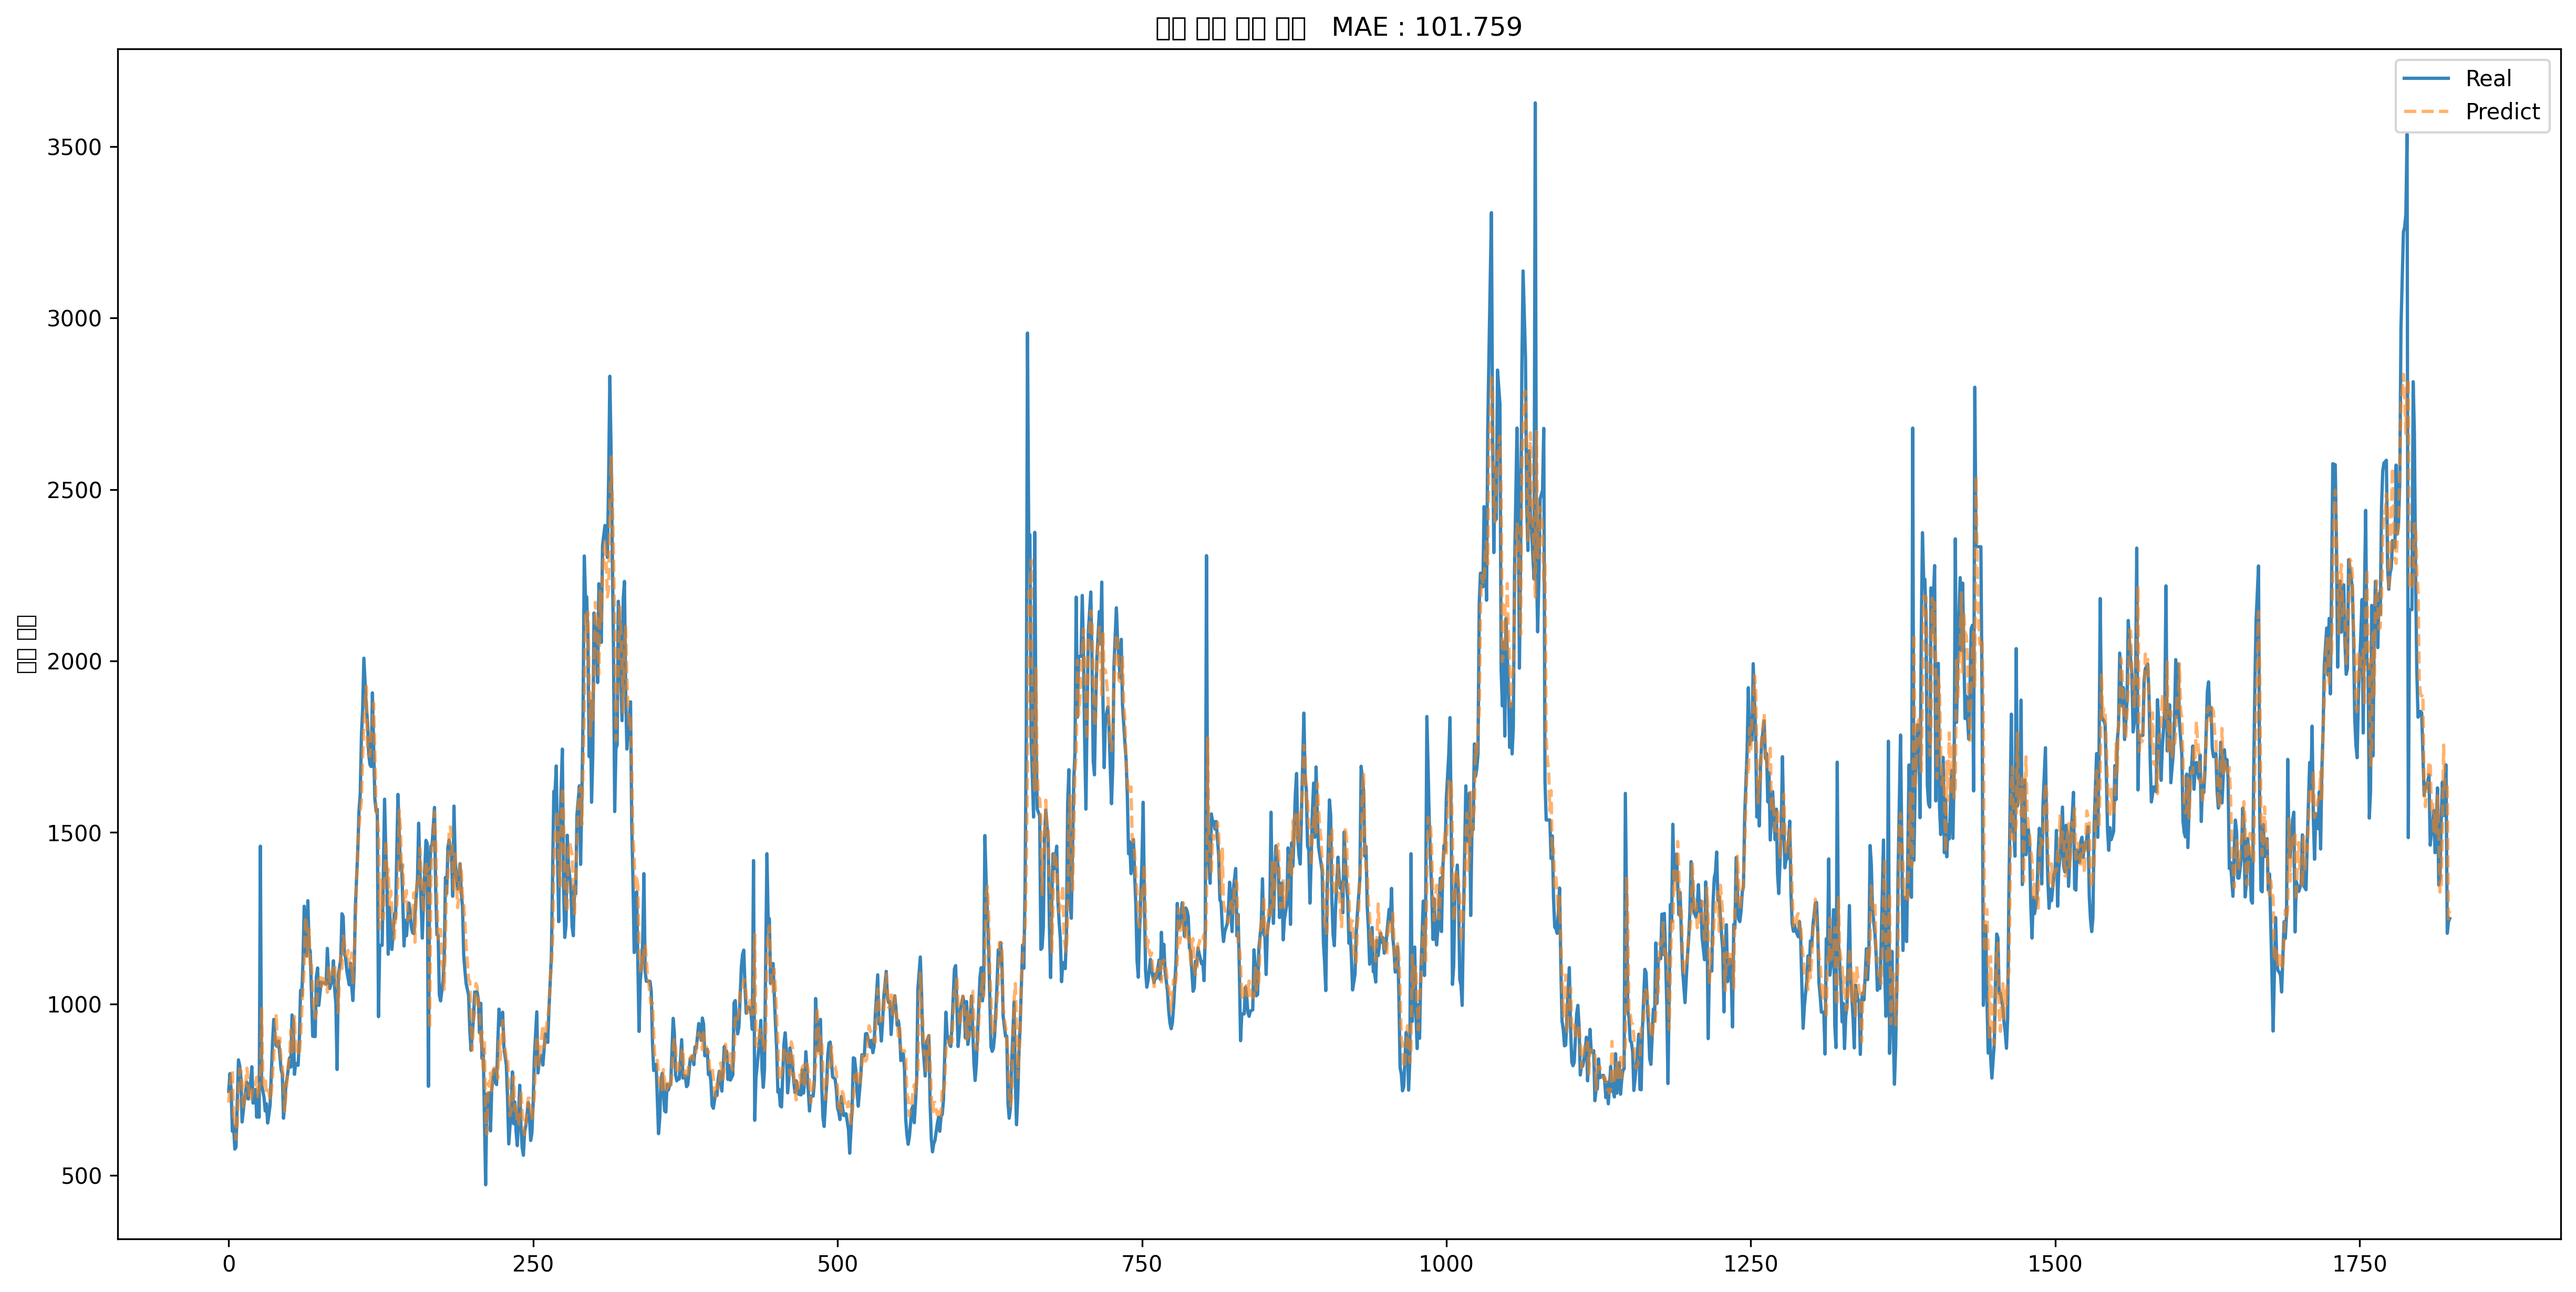

In [ ]:
my_nong1.get_plot()

In [19]:
features = ['배추', '양파', '마늘', '깻잎','대파', '상추', '양상추', '무', '시금치']

day7=[]

for feature in features:
  print(feature)
  a = 0
  for i in range(1,8):
    print(i)
    my_nong1 = Nong1(data.iloc[:-1], data.iloc[[-1]])
    my_nong1.set_feature(feature)
    my_nong1.set_target(i)
    my_nong1.set_model()
    a += my_nong1.get_price()
  day7.append(int(round((a/7),0)))
day7

배추
1
1/1 [==============================] - 0s 195ms/step
2
1/1 [==============================] - 0s 192ms/step
3
1/1 [==============================] - 0s 199ms/step
4
1/1 [==============================] - 0s 194ms/step
5
1/1 [==============================] - 0s 203ms/step
6
1/1 [==============================] - 0s 205ms/step
7
1/1 [==============================] - 0s 194ms/step
양파
1
1/1 [==============================] - 0s 194ms/step
2
1/1 [==============================] - 0s 202ms/step
3
1/1 [==============================] - 0s 190ms/step
4
1/1 [==============================] - 0s 196ms/step
5
1/1 [==============================] - 0s 185ms/step
6
1/1 [==============================] - 0s 200ms/step
7
1/1 [==============================] - 0s 191ms/step
마늘
1
1/1 [==============================] - 0s 197ms/step
2
1/1 [==============================] - 0s 203ms/step
3
1/1 [==============================] - 0s 204ms/step
4
1/1 [==============================] - 0s 192ms/step
5

[1316, 1433, 6708, 4833, 2242, 2249, 1545, 1112, 2635]

In [24]:
week = pd.DataFrame(day7)
week = week.T
week.columns = features

In [ ]:
date = datetime.datetime.now()
start = str(date.strftime('%Y%m%d'))

path = '/content/gdrive/MyDrive/KB_FInal/'
title = 'prediction' + start + '.csv'
week.to_csv( title, encoding='utf-8-sig', index=False)
